In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np

2024-05-11 21:41:59.521744: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.optimizers import SGD

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
# load dataset
(trainX, y_train), (testX, y_test) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, y_train.shape))
print('Test: X=%s, y=%s' % (testX.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_class = 10

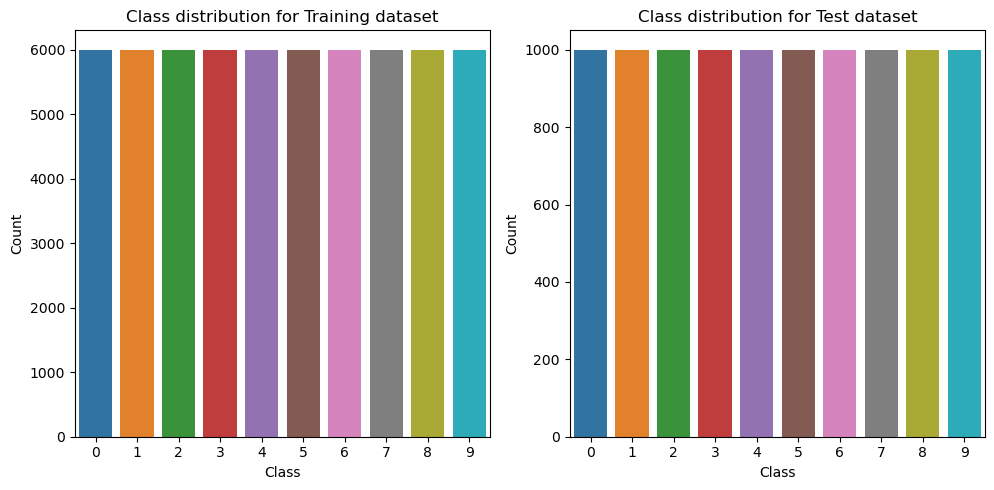

In [6]:
import pandas as pd
import seaborn as sns
# Create separate Series for each dataset
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

# Calculate value counts for each dataset
class_counts_train = y_train_series.value_counts()
class_counts_test = y_test_series.value_counts()

# Plotting class distributions for each dataset
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=class_counts_train.index, y=class_counts_train.values)
plt.title("Class distribution for Training dataset")
plt.xlabel("Class")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
sns.barplot(x=class_counts_test.index, y=class_counts_test.values)
plt.title("Class distribution for Test dataset")
plt.xlabel("Class")
plt.ylabel("Count")



plt.tight_layout()
plt.show()

In [7]:
print ('The shape of first element of X is: ', trainX[0].shape)

The shape of first element of X is:  (28, 28)


In [8]:
# reshape the data into 1D vectors
x_train = trainX.reshape(60000, 784)
x_test = testX.reshape(10000, 784)

In [9]:
print ('The shape of first element of X is: ', x_train[0].shape)

The shape of first element of X is:  (784,)


In [10]:
x_train.shape[1]

784

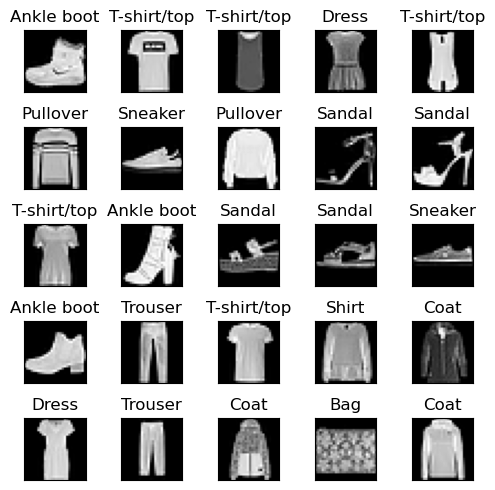

In [11]:
plt.figure(figsize=(5,5))
# plot first few images
for i in range(25):
 # define subplot
 ax = plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 ax.imshow(trainX[i], cmap=plt.get_cmap('gray'))
 ax.title.set_text(class_names[y_train[i]])   
plt.tight_layout()
plt.show()

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
            zoom_range = 0.1, # Randomly zoom image 
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=False,  # randomly flip images
            vertical_flip=False)  # randomly flip images

In [12]:
# scale the values
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [17]:
datagen.fit(x_train.reshape(-1, 28, 28, 1))

In [15]:
y_label = y_train # Just keeping a copy of the original labels before the one-hot-encoding
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


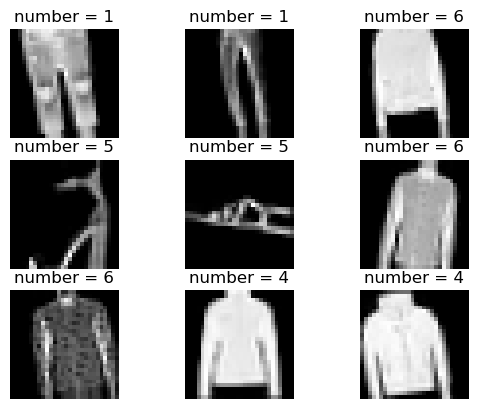

In [19]:
def decode(label): # Since we have encoded the labels,we need to decode it to access to the original number.
    maxi = max(label)
    for i in range(len(label)+1):
        if label[i] == maxi:
            return(i)

for X_batch, y_batch in datagen.flow(x_train.reshape(-1, 28, 28, 1), y_train, batch_size=9):
    for i in range(0,9):
        plt.subplot(330 + 1 + i)
        plt.axis('off')
        plt.imshow(X_batch[i][:,:,0], cmap='gray')
        plt.title('number = ' + str(decode(y_batch[i])))
    break
# Since we are now batching, we won't get the exact same images from the last exemple.

AttributeError: 'ImageDataGenerator' object has no attribute 'shape'

In [17]:
X_train_augmented.shape

(300000, 784)

In [18]:
x_train.shape

(60000, 784)

In [19]:
X_train_augmented[0].shape

(784,)

In [20]:
X_train_augmented[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**Splitting the data into cross-validation and test**

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [14]:
x_test.shape

(10000, 784)

In [15]:
x_cv, x_test, y_cv, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=1)

In [16]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('CV: X=%s, y=%s' % (x_cv.shape, y_cv.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 784), y=(60000,)
CV: X=(5000, 784), y=(5000,)
Test: X=(5000, 784), y=(5000,)


**Building the Neural Network model**

1. Callbacks

In [94]:
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
import math
def scheduler(epoch, lr):
    if epoch < 30: # For the first 10 epochs, the learning rate is not changed
        return(lr)
    
    else:
        return(lr*math.exp(-0.1)) # And then decreases even more, still exponentially

LRScheduler = LearningRateScheduler(scheduler)


In [61]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta =0, patience=50, verbose=1, mode='min',restore_best_weights=True) 
# If after 5 epochs (*patience=5*), the validation loss haven't decreased at all (*min_delta=0), the training stage is stopped

Model

In [28]:
#all models
def build_model():
    
    tf.random.set_seed(20)
    
    model_1 = Sequential(
        [
            tf.keras.Input(shape=(784,)),
            Dense(128, activation = 'relu', name = "L1"),
            Dense(128, activation = 'relu', name = "L2"),
            Dense(10, activation = 'linear', name = "L3")
        ],
        name='model_1'
    )


    model_2 = Sequential(
        [
            tf.keras.Input(shape=(784,)),
            Dense(128, activation = 'relu', name = "L1"),
            Dense(64, activation = 'relu', name = "L2"),
            Dense(32, activation = 'relu', name = "L3"),
            Dense(16, activation = 'relu', name = "L4"),
            Dropout(0.1, name = "L5"),
            Dense(128, activation = 'relu', name = "L6"),
            Dense(10, activation = 'linear', name = "L7")
        ],
        name='model_2'
    )
    
    model_list = [model_1, model_2]
    
    return model_list

In [22]:
from sklearn.metrics import accuracy_score
import keras

In [29]:
nn_models = build_model()
model1 = nn_models[0]
[layer1, layer2, layer3] = model1.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 128), b1 shape = (128,)
W2 shape = (128, 128), b2 shape = (128,)
W3 shape = (128, 10), b3 shape = (10,)


In [35]:
model2 = nn_models[1]
[layer1, layer2, layer3, layer4, layer5, layer6, layer7] = model2.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
W4,b4 = layer4.get_weights()
W6,b6 = layer6.get_weights()
W7,b7 = layer7.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")
print(f"W3 shape = {W4.shape}, b3 shape = {b4.shape}")
print(f"W3 shape = {W6.shape}, b3 shape = {b6.shape}")
print(f"W3 shape = {W7.shape}, b3 shape = {b7.shape}")

W1 shape = (784, 128), b1 shape = (128,)
W2 shape = (128, 64), b2 shape = (64,)
W3 shape = (64, 32), b3 shape = (32,)
W3 shape = (32, 16), b3 shape = (16,)
W3 shape = (16, 128), b3 shape = (128,)
W3 shape = (128, 10), b3 shape = (10,)


In [36]:
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (4,3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0, 1])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()


In [62]:
# Initialize lists that will contain the errors for each model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
nn_train_error = []
nn_cv_error = []
tacc = []
vacc = []
tloss = []
vloss = []
score_l=[]
score_acc = []
image_size = x_train.shape[1]
input_size = image_size * image_size
BATCH_SIZE =128  #int(image_size/100)
STEPS_PER_EPOCH = x_train.shape[0] // BATCH_SIZE
e = []
hist = []
data_augmentation = True

CALLBACKS = [ earlystopper, LRScheduler]
max_batches = len(x_train) / BATCH_SIZE

Compiling and Training

In [38]:
decay_rate = 0.1
momentum = 0.8

# define the optimizer function
sgd = SGD(learning_rate = 0.1, momentum=momentum, decay=decay_rate, nesterov=False)

Training model_1...
Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9288 - loss: 0.1864 - val_acc: 0.8928 - val_loss: 0.3663
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9326 - loss: 0.1748 - val_acc: 0.8924 - val_loss: 0.3718
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9345 - loss: 0.1702 - val_acc: 0.8928 - val_loss: 0.3829
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9365 - loss: 0.1667 - val_acc: 0.8932 - val_loss: 0.3850
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9379 - loss: 0.1628 - val_acc: 0.8928 - val_loss: 0.3857
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9389 - loss: 0.1598 - val_acc: 0.8944 - val_loss: 0.3974
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9404 - loss: 0.1572 - val_acc: 0.8908 - val_loss: 0.4074
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9413 - loss: 0.1541 - val_acc: 0.8924 - val_loss: 0.4169
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━

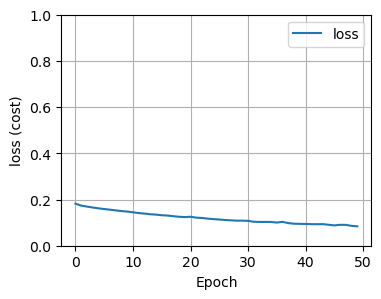

In [82]:
# Setup the loss and optimizer (implements Softmax)
model1.compile(
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['acc'])
    
print(f"Training {model1.name}...")
history = model1.fit(x_train, y_train, epochs=50, batch_size = BATCH_SIZE, validation_data = (x_cv, y_cv))
plot_loss_tf(history)

In [83]:
scores = model1.evaluate(x_cv,
                        y_cv,
                        batch_size=BATCH_SIZE,
                        verbose=False)
print('CV loss:', scores[0])
print('CV accuracy: %0.1f%%' % (100 * scores[1]) )

CV loss: 0.7906960248947144
CV accuracy: 89.0%


Training model_2...
Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9190 - loss: 0.2171 - val_accuracy: 0.8886 - val_loss: 0.3482 - learning_rate: 0.0010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9230 - loss: 0.2076 - val_accuracy: 0.8924 - val_loss: 0.3431 - learning_rate: 0.0010
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9254 - loss: 0.1996 - val_accuracy: 0.8896 - val_loss: 0.3547 - learning_rate: 0.0010
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9292 - loss: 0.1918 - val_accuracy: 0.8882 - val_loss: 0.3643 - learning_rate: 0.0010
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9308 - loss: 0.1858 - val_accuracy: 0.8876 - val_loss: 0.3546 - learning_rate: 0.0010
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9325 - loss: 0.1809 - val_accuracy: 0.8904 - val_loss: 0.3545 - learning_rate: 0.0010
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.93

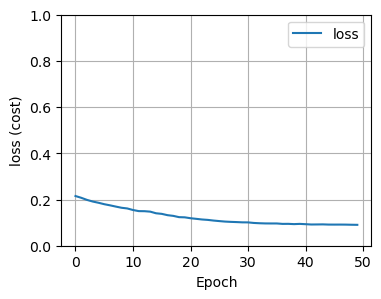

In [95]:
# Setup the loss and optimizer (implements Softmax)
model2.compile(
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
    
print(f"Training {model2.name}...")
history = model2.fit(x_train, y_train, epochs=50, batch_size = BATCH_SIZE, callbacks = CALLBACKS, validation_data = (x_cv, y_cv))
plot_loss_tf(history)

In [96]:
scores = model2.evaluate(x_cv,
                        y_cv,
                        #batch_size=BATCH_SIZE,
                        verbose=False)
print('CV loss:', scores[0])
print('CV accuracy: %0.1f%%' % (100 * scores[1]) )

CV loss: 0.3481962978839874
CV accuracy: 88.9%


In [97]:
from scipy.ndimage.interpolation import shift
from sklearn.metrics import accuracy_score
import numpy as np

# Method to shift the image by given dimension
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


# Creating Augmented Dataset
X_train_augmented = [image for image in x_train]
y_train_augmented = [image for image in y_train]

for dx, dy in ((1,0), (-1,0), (0,1)):
     for image, label in zip(x_train, y_train):
             X_train_augmented.append(shift_image(image, dx, dy))
             y_train_augmented.append(label)


# Shuffle the dataset
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = np.array(X_train_augmented)[shuffle_idx]
y_train_augmented = np.array(y_train_augmented)[shuffle_idx]

print(f"{X_train_augmented.shape}, y: {y_train_augmented.shape}")

(240000, 784), y: (240000,)


In [58]:
# Training on augmented dataset
#rf_clf_for_augmented = RandomForestClassifier(random_state=42)
history = model1.fit(X_train_augmented, y_train_augmented, epochs=50, batch_size = BATCH_SIZE, callbacks = CALLBACKS, validation_data = (x_cv, y_cv))
plot_loss_tf(history)

Epoch 1/50
42858/42858 ━━━━━━━━━━━━━━━━━━━━ 47s 1ms/step - acc: 0.1434 - loss: 2.1921 - val_acc: 0.0990 - val_loss: 2.3133 - learning_rate: 0.1000
Epoch 2/50
42858/42858 ━━━━━━━━━━━━━━━━━━━━ 47s 1ms/step - acc: 0.1044 - loss: 2.3042 - val_acc: 0.1992 - val_loss: 1.7877 - learning_rate: 0.1000
Epoch 3/50
42858/42858 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step - acc: 0.1691 - loss: 2.0239 - val_acc: 0.0990 - val_loss: 2.3131 - learning_rate: 0.1000
Epoch 4/50
 6127/42858 ━━━━━━━━━━━━━━━━━━━━ 53s 1ms/step - acc: 0.0983 - loss: 2.3191

KeyboardInterrupt: 

KeyError: 'val_loss'

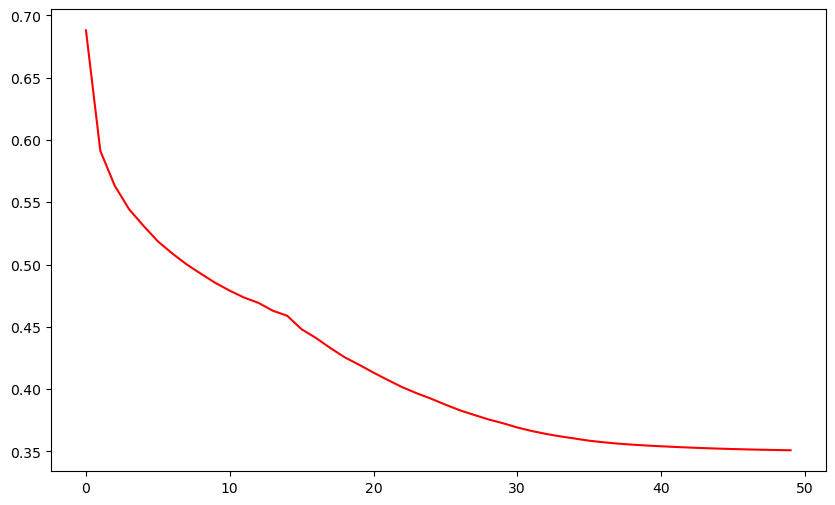

In [32]:

# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['acc']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [34]:
# Training on augmented dataset
#rf_clf_for_augmented = RandomForestClassifier(random_state=42)
history = model2.fit(X_train_augmented, y_train_augmented, epochs=50, batch_size = BATCH_SIZE, callbacks = CALLBACKS)
plot_loss_tf(history)

Epoch 1/50
42858/42858 ━━━━━━━━━━━━━━━━━━━━ 131s 3ms/step - acc: 0.9532 - loss: 0.1242 - learning_rate: 3.6979e-06
Epoch 2/50
42858/42858 ━━━━━━━━━━━━━━━━━━━━ 103s 2ms/step - acc: 0.9531 - loss: 0.1241 - learning_rate: 3.6979e-06
Epoch 3/50
42858/42858 ━━━━━━━━━━━━━━━━━━━━ 87s 2ms/step - acc: 0.9532 - loss: 0.1239 - learning_rate: 3.6979e-06
Epoch 4/50
42858/42858 ━━━━━━━━━━━━━━━━━━━━ 122s 3ms/step - acc: 0.9533 - loss: 0.1238 - learning_rate: 3.6979e-06
Epoch 5/50
42858/42858 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - acc: 0.9534 - loss: 0.1236 - learning_rate: 3.6979e-06
Epoch 6/50
42858/42858 ━━━━━━━━━━━━━━━━━━━━ 86s 2ms/step - acc: 0.9535 - loss: 0.1234 - learning_rate: 3.6979e-06
Epoch 7/50
42858/42858 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - acc: 0.9536 - loss: 0.1232 - learning_rate: 3.6979e-06
Epoch 8/50
42858/42858 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - acc: 0.9536 - loss: 0.1230 - learning_rate: 3.6979e-06
Epoch 9/50
42858/42858 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - acc: 0.9537 - loss: 0.1228

KeyboardInterrupt: 

In [23]:

# Loop over the the models
for model in nn_models:
    p = []
    p1 = []
    # Setup the loss and optimizer (implements Softmax)
    model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['acc'])



    print(f"Training {model.name}...")
    
    #batch_size = int(input_dim/100)
# Run training, with or without data augmentation.
    if not data_augmentation:
        print('Not using data augmentation.')
    # train the network no data augmentation
        x_train = np.reshape(x_train, [-1, input_size])
        model.fit(x_train, y_train, epochs=40, batch_size=BATCH_SIZE, callbacks = CALLBACKS)
    else:
        print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    # we need [width, height, channel] dim for data aug
        x_train_gen = np.reshape(x_train, [-1, image_size, image_size, 1])
        datagen = ImageDataGenerator(
           featurewise_center=False,
           featurewise_std_normalization=False,
           rotation_range=10,
           width_shift_range=0.1,
           height_shift_range=0.1,
           horizontal_flip=False)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
        datagen.fit(x_train_gen)
    # fits the model on batches with real-time data augmentation:
    #model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
    #                    steps_per_epoch=len(x_train) / 32, 
    #                    epochs=epochs)
        for e in range(40):
            print('Epoch', e)
            batches = 0
            for x_batch, y_batch in datagen.flow(x_train_gen, y_train, batch_size=BATCH_SIZE):
                x_batch = np.reshape(x_batch, [-1, image_size*image_size])
                model.fit(x_batch, y_batch, verbose=False, callbacks = CALLBACKS)
                batches += 1
                if batches >= len(x_train_gen) / 32:
                # we need to break the loop by hand because
                # the generator loops indefinitely
                   break
    # Score trained model.
    x_cv = np.reshape(x_cv, [-1, image_size, image_size, 1])
    scores = model.evaluate(x_cv,
                            y_cv,
                            batch_size=BATCH_SIZE,
                            verbose=False)
    score_l.append(scores[0])
    score_acc.append(100 * scores[1])
    
print("RESULT:")
for i in range(2):
    print(f"Model {i}:")
    print('Test loss:', scores[0])
    print('Test accuracy: %0.1f%%' % (100 * scores[1]) )

Training model_1...
Using real-time data augmentation.
Epoch 0


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32, 10), output.shape=(32, 10)

In [ ]:
plot_loss_tf(history)

In [ ]:
# Score trained model.
x_test = np.reshape(x_test, [-1, input_size])
scores = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=False)
print('Test loss:', scores[0])
print('Test accuracy: %0.1f%%' % (100 * scores[1]) )

In [37]:
# Train the model
BATCH_SIZE = 64
STEPS_PER_EPOCH = x_train.shape[0] // BATCH_SIZE # Since we are batching, we need to specify when the model should consider that one epoch has been processed.
# A proper way to fix this parameter is to have a number of step equal to the number of data
CALLBACKS = [ earlystopper, LRScheduler]

print(f"Training {model.name}...")
history = model.fit(datagen.flow(x_train.reshape(-1,28,28,1), y_train, batch_size = 64), epochs = 40, 
                              validation_data = (x_cv, y_cv), verbose=1, 
                              steps_per_epoch=STEPS_PER_EPOCH,
                              callbacks = CALLBACKS)

    
print("Done!\n")
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
tacc.append(acc)
vacc.append(val_acc)
tloss.append(loss)
vloss.append(val_loss)
e.append(epochs)

Training model_1...


ValueError: Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape (60000, 784)

**I will improve Model 3**

In [60]:
model = nn_models[2]
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_26 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 354,848 (1.35 MB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 236,566 (924.09 KB)

**Increasing Epochs?**

In [61]:
p = []
p1 = []
history = model.fit(
    trainX_norm, trainy,
    epochs=60,
    verbose=0
)
yhatt = model.predict(trainX_norm)
for i in range(yhatt.shape[0]):
    p.append(np.argmax(yhatt[i]))
p = np.array(p)
train_mse = mean_squared_error(p, trainy) / 2
tacc=(accuracy_score(p, trainy))

# Record the cross validation MSEs 
yhat = model.predict(x_cv)
for i in range(yhat.shape[0]):
    p1.append(np.argmax(yhat[i]))
p1 = np.array(p1)
cv_mse = mean_squared_error(p1, y_cv) / 2
acc=(accuracy_score(p1, y_cv))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step


In [64]:
p = []
p1 = []
history = model.fit(
    trainX_norm, trainy,
    epochs=80,
    verbose=0
)
yhatt = model.predict(trainX_norm)
for i in range(yhatt.shape[0]):
    p.append(np.argmax(yhatt[i]))
p = np.array(p)
train_mse = mean_squared_error(p, trainy) / 2
tacc=(accuracy_score(p, trainy))

# Record the cross validation MSEs 
yhat = model.predict(x_cv)
for i in range(yhat.shape[0]):
    p1.append(np.argmax(yhat[i]))
p1 = np.array(p1)
cv_mse = mean_squared_error(p1, y_cv) / 2
acc=(accuracy_score(p1, y_cv))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [ ]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [ ]:
def display_errors(model,X,y):
    f = model.predict(X)
    yhat = np.argmax(f, axis=1)
    doo = yhat != y[:,0]
    idxs = np.where(yhat != y[:,0])[0]
    if len(idxs) == 0:
        print("no errors found")
    else:
        cnt = min(8, len(idxs))
        fig, ax = plt.subplots(1,cnt, figsize=(5,1.2))
        fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.80]) #[left, bottom, right, top]
        widgvis(fig)

        for i in range(cnt):
            j = idxs[i]
            X_reshaped = X[j].reshape((20,20)).T

            # Display the image
            ax[i].imshow(X_reshaped, cmap='gray')

            # Predict using the Neural Network
            prediction = model.predict(X[j].reshape(1,400))
            prediction_p = tf.nn.softmax(prediction)
            yhat = np.argmax(prediction_p)

            # Display the label above the image
            ax[i].set_title(f"{y[j,0]},{yhat}",fontsize=10)
            ax[i].set_axis_off()
            fig.suptitle("Label, yhat", fontsize=12)
    return(len(idxs))
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")

In [63]:
#Plot loss results for training data and testing data 
plt.plot(model.history['loss'], 'blue')
plt.plot(model.history['val_loss'], 'orange')
plt.title('Model loss for the NN-3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

TypeError: 'History' object is not subscriptable

**Does changing the number of neurons improve our classification?**

**Hyperparameter tuning**